# Question 1

Dataset: Kaggle link (Weather Data)
Consider the above-mentioned dataset for a regression problem (where output labels are numeric) and apply following feature selection techniques:
        Correlation Analysis
        Mutual Information
        Variance Threshold (Not discussed in the lecture, need to do a research by your side)
Plot the feature importance graph as well and comment which technique provided more usefule set of features and why ?


In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [78]:
PATH = 'weatherHistory.csv'

In [217]:
def load_csv(path: str) -> 'dataframe':
    '''
    Description: loads dataframe and provide some
    basic information about the dataframe
    input
        path: path to dataframe
    output
        a dataframe
    '''
    df = pd.read_csv(path)
    print('columns:\n', df.columns,'\n')
    print('columns data types:\n', df.dtypes,'\n')
    print('lenght of data frame:', len(df))
    return df


def float_data(df: 'dataframe'):

    df_float = df.select_dtypes('float')
    df_float.fillna(df_float.mean())
    return df_float

# Note: THIS IS USED FOR BOTH QUESTION ONE AND TWO
def feature_importance(
    df: 'dataframe',
    type_target: str,
    target: str,
    ):
    '''
    This function plots the feature importance
    df: dataframe
    type_target: numerical or categorical. based on this we use regressor or classifier
    possible values are num or cat
    target: target column
    '''
    if type_target == 'num':
        clf = RandomForestRegressor(n_estimators=30)
    elif type_target == 'cat':
        clf = RandomForestRegressor(n_estimators=30)
    else:
        print('please enter a valid type of target: "num" or "cat"')
        return
    df_indep = df.loc[:, df.columns!=target]
    target = df[target]
    model = clf.fit(df_indep, target)
    feat_importances = pd.DataFrame(model.feature_importances_, index=df_indep.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar')

In [218]:
# loading dataframe and having some
# basic analysis
path = PATH
df = load_csv(PATH)
df.head(5)

columns:
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object') 

columns data types:
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object 

lenght of data frame: 96453


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [219]:
# Description of the data
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [220]:
# just numeric data, dropping dates and categorical data
# This is only done for these analysis, if we do regression
# they will be encoded
df = float_data(df)

In [221]:
df.head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


#### Correlation
The function is described above. Any two columns that have correlation above 0.5 are removed from our data.

In [222]:
def corr_analysis(df: 'dataframe'):
    '''
    Description: generates a correlation heatmap and suggests
    columns that can be dropped based on correlation
    input
        df: dataframe, should only have numeric data
    '''
    df_indep = df.loc[:, df.columns!='Humidity']
    corr = df_indep.corr(method='pearson')
    for col in corr.columns:
        for ind in corr.index:
            if (col != ind) and (corr[col][ind] > 0.5):
                print(f'{col} and {ind} are correlated. you can drop one!')
    f,ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr,cmap="YlGnBu", annot=True)
    return corr

Temperature (C) and Apparent Temperature (C) are correlated. you can drop one!
Apparent Temperature (C) and Temperature (C) are correlated. you can drop one!


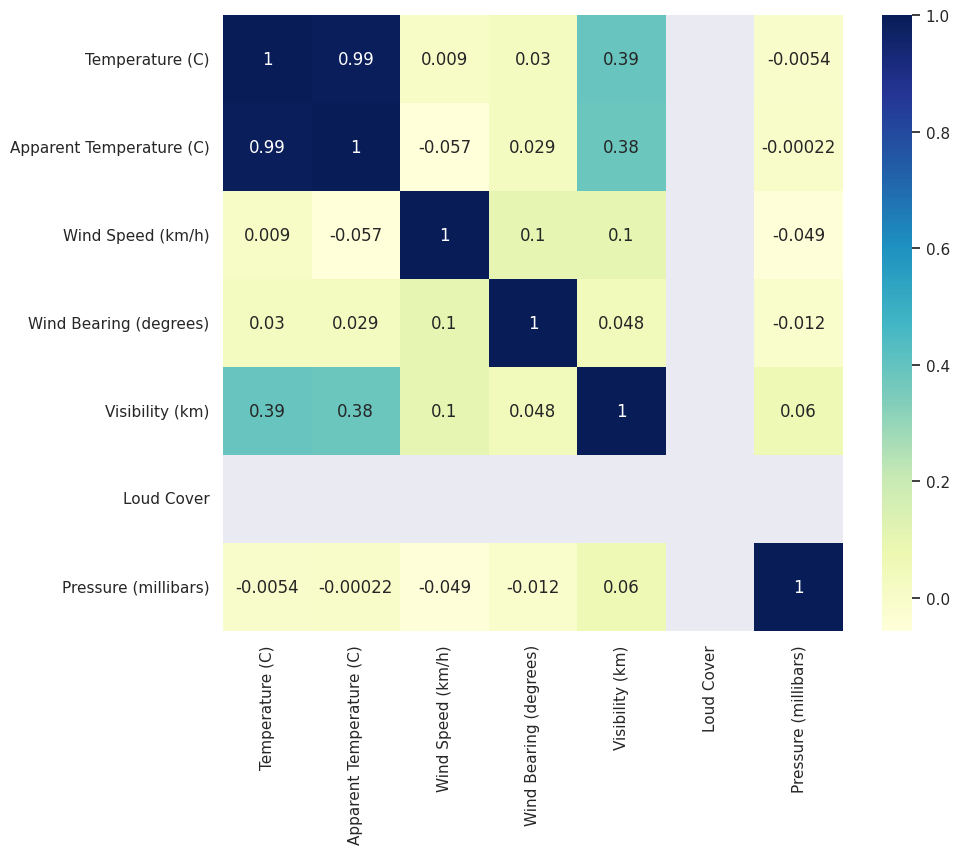

In [223]:
corr = corr_analysis(df)

The correlation analysis shows that Temp and Apparent Temp are highly correlated. the function suggests that we can drop one. I choose to drop Apparent Temp

In [224]:
df_corr_final = df.loc[:, df.columns != 'Apparent Temperature (C)']
df_corr_final.head(5)

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51


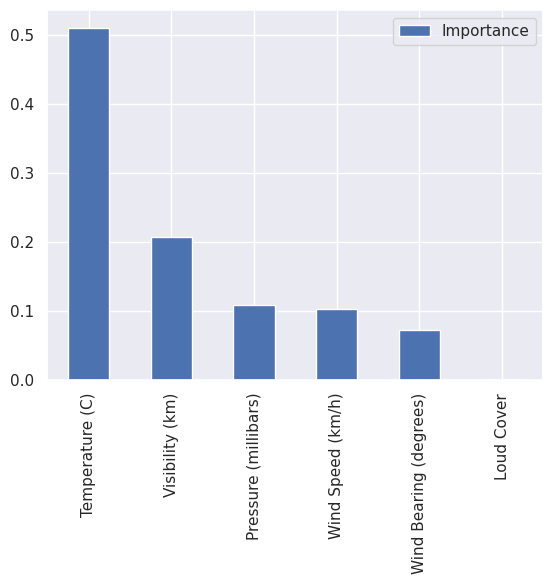

In [225]:
feature_importance(df_corr_final,'num','Humidity')

### Mutual info classification
Dependent variable is not specified in the question. So we took **Humidity** as dependent variable. The categorical data are of no importance as they are summary. So we didn't used any type of encoding but used the dataframe that doesn't have them

In [175]:
def mutual_info(df:'dataframe', threshold=5):
    '''
    Description: applies mutual information technique for 
    feature selection
    input
        df: dataframe, should only have numeric data
    '''
    if threshold > len(df.columns):
        print('Error, choose, lower threshold!')
        return
    target = df['Humidity']
    df_indep = df.loc[:, df.columns != 'Humidity']
    selector = SelectKBest(mutual_info_regression, k=threshold)
    new_data = selector.fit_transform(df_indep, target)
    mask = selector.get_support()
    new_features = df_indep.columns[mask]
    return new_features

In [247]:
# Lets select top 3 features
mutual_info_reg_cols = mutual_info(df,4).to_list()
print(mutual_info_reg_cols)

['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)']


We compare these with our data and we can see that the top 3 features that are suggested are **Temperature, Apparent Temperature, Wind Speed and Visibility**. We can drop other columns

In [251]:
mutual_info_reg_cols.append('Humidity')
df_mutual_info_reg_final = df[mutual_info_reg_cols]
df_mutual_info_reg_final.head(5)

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Visibility (km),Humidity,Humidity
0,9.472222,7.388889,14.1197,15.8263,0.89,0.89
1,9.355556,7.227778,14.2646,15.8263,0.86,0.86
2,9.377778,9.377778,3.9284,14.9569,0.89,0.89
3,8.288889,5.944444,14.1036,15.8263,0.83,0.83
4,8.755556,6.977778,11.0446,15.8263,0.83,0.83


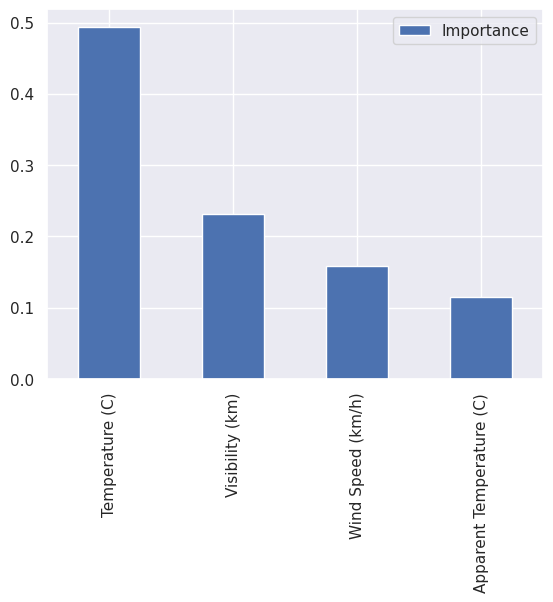

In [252]:
feature_importance(df_mutual_info_reg_final,'num','Humidity')

### Variance Threshold

In [144]:
def variance_thresh(df: 'dataframe', threshold=0):
    df_indep = df.loc[:, df.columns != 'Humidity']
    var = VarianceThreshold(threshold=threshold)
    var.fit(df_indep)
    var_array = var.get_support()
    columns = df_indep.columns
    filtered = []
    for i in range (len(var_array)):
        if not var_array[i]:
            pass
        else:
            filtered.append(columns[i])
    return var.get_support(), filtered

In [253]:
variance_array, filt = variance_thresh(df, 0.20)
print('filtered list of columns after applying variance threshold: ', filt)

filtered list of columns after applying variance threshold:  ['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


Varaince threshold only suggests to remove Loud Cover column. this column has zero variance

In [254]:
filt.append('Humidity')
df_var_final = df[filt]
df_var_final.head(10)

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Humidity
0,9.472222,7.388889,14.1197,251.0,15.8263,1015.13,0.89
1,9.355556,7.227778,14.2646,259.0,15.8263,1015.63,0.86
2,9.377778,9.377778,3.9284,204.0,14.9569,1015.94,0.89
3,8.288889,5.944444,14.1036,269.0,15.8263,1016.41,0.83
4,8.755556,6.977778,11.0446,259.0,15.8263,1016.51,0.83
5,9.222222,7.111111,13.9587,258.0,14.9569,1016.66,0.85
6,7.733333,5.522222,12.3648,259.0,9.9820,1016.72,0.95
7,8.772222,6.527778,14.1519,260.0,9.9820,1016.84,0.89
8,10.822222,10.822222,11.3183,259.0,9.9820,1017.37,0.82
9,13.772222,13.772222,12.5258,279.0,9.9820,1017.22,0.72


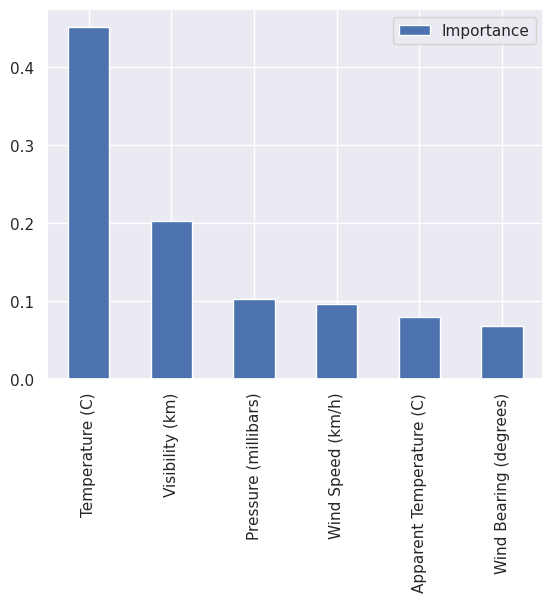

In [255]:
feature_importance(df_var_final, 'num','Humidity')

### Comments
Lets examine each method one by one:
1- Correlation: this method only consideres highly correlated columns. Its useful when considering cross examination of columns. It will not provide any insight for stand alone importance of a column to the target variable and prediction of it

2- Mutual Info: This method measures the dependency of variables to each other. Say A and B has high dependency with other variables but they also have high correlation/dependency to each other, this method doesn't catch that and we will end up with two highly correlated features in our data

3-Variance: This only considers the column itself and not its relationship with other columns. It is useful if you wan't to examine a column independently form other columns

A good approach in our opinion is to use Mutual Info to see the dependency of variables to each other and use correlation to neglect highly correlated data. However to find the best answer we have to do cross-validation

# Question 2

In [185]:
path2 = 'breast_cancer_dataset.csv'
df2 = load_csv(path2)
df2.head(10)

columns:
 Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object') 

columns data types:
 class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object 

lenght of data frame: 286


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


Our target variable would be deg-malig which stands for degree of malignancy.

In [186]:
# lets see unique types each categorical data
for col in df2:
    print(col, " : ", df2[col].unique())

class  :  ['no-recurrence-events' 'recurrence-events']
age  :  ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause  :  ['premeno' 'ge40' 'lt40']
tumor-size  :  ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes  :  ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps  :  ['no' 'yes' '?']
deg-malig  :  [3 2 1]
breast  :  ['left' 'right']
breast-quad  :  ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
irradiat  :  ['no' 'yes']


In [188]:
def cat_to_ordinal(df: 'dataframe', columns: list):
    ordinal = OrdinalEncoder()
    ordinal.fit(df[columns])
    df[columns] = ordinal.transform(df[columns])
    return df

In [189]:
cat_to_ordinal(df2, ['class','age','menopause','tumor-size','inv-nodes','node-caps','breast','breast-quad','irradiat'])

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0.0,1.0,2.0,5.0,0.0,1.0,3,0.0,2.0,0.0
1,0.0,2.0,2.0,3.0,0.0,1.0,2,1.0,5.0,0.0
2,0.0,2.0,2.0,3.0,0.0,1.0,2,0.0,2.0,0.0
3,0.0,4.0,0.0,2.0,0.0,1.0,2,1.0,3.0,0.0
4,0.0,2.0,2.0,0.0,0.0,1.0,2,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
281,1.0,1.0,2.0,5.0,0.0,1.0,2,0.0,3.0,0.0
282,1.0,1.0,2.0,3.0,0.0,1.0,3,0.0,3.0,1.0
283,1.0,4.0,0.0,3.0,0.0,1.0,1,1.0,3.0,0.0
284,1.0,2.0,0.0,5.0,4.0,1.0,3,0.0,2.0,0.0


### Chi2

In [200]:
def chi_squared(df:'dataframe', threshold=5):
    '''
    Description: applies mutual information technique for 
    feature selection
    input
        df: dataframe, should only have numeric data
    '''
    if threshold > len(df.columns):
        print('Error, choose, lower threshold!')
        return
    target = df['deg-malig']
    df_indep = df.loc[:, df.columns != 'deg-malig']
    selector = SelectKBest(chi2, k=threshold)
    new_data = selector.fit_transform(df_indep, target)
    mask = selector.get_support()
    new_features = df_indep.columns[mask]
    return new_features

In [257]:
chi_features = chi_squared(df2).to_list()
print(chi_features)

['age', 'tumor-size', 'inv-nodes', 'node-caps', 'breast']


In [258]:
chi_features.append('deg-malig')
df2_chi2_final = df2[chi_features]
df2_chi2_final

,age,tumor-size,inv-nodes,node-caps,breast,deg-malig
0,1.0,5.0,0.0,1.0,0.0,3
1,2.0,3.0,0.0,1.0,1.0,2
2,2.0,3.0,0.0,1.0,0.0,2
3,4.0,2.0,0.0,1.0,1.0,2
4,2.0,0.0,0.0,1.0,1.0,2
...,...,...,...,...,...,...
281,1.0,5.0,0.0,1.0,0.0,2
282,1.0,3.0,0.0,1.0,0.0,3
283,4.0,3.0,0.0,1.0,1.0,1
284,2.0,5.0,4.0,1.0,0.0,3


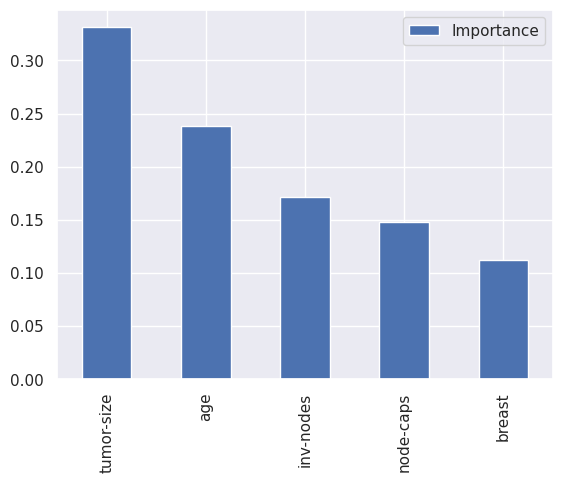

In [259]:
feature_importance(df2_chi2_final, 'cat','deg-malig')

### Mutual Info

In [209]:
def mutual_info_cat(df:'dataframe', threshold=5):
    '''
    Description: applies mutual information technique for 
    feature selection
    input
        df: dataframe, should only have numeric data
    '''
    if threshold > len(df.columns):
        print('Error, choose, lower threshold!')
        return
    target = df['deg-malig']
    df_indep = df.loc[:, df.columns != 'deg-malig']
    selector = SelectKBest(mutual_info_classif, k=threshold)
    new_data = selector.fit_transform(df_indep, target)
    mask = selector.get_support()
    new_features = df_indep.columns[mask]
    return new_features

In [260]:
mutual_features = mutual_info_cat(df2).to_list()
print(mutual_features)

['menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'irradiat']


In [261]:
mutual_features.append('deg-malig')
df2_mut_cat_final = df2[mutual_features]
df2_mut_cat_final.head(10)

,menopause,tumor-size,inv-nodes,node-caps,irradiat,deg-malig
0,2.0,5.0,0.0,1.0,0.0,3
1,2.0,3.0,0.0,1.0,0.0,2
2,2.0,3.0,0.0,1.0,0.0,2
3,0.0,2.0,0.0,1.0,0.0,2
4,2.0,0.0,0.0,1.0,0.0,2
5,0.0,2.0,0.0,1.0,0.0,2
6,2.0,4.0,0.0,1.0,0.0,2
7,0.0,3.0,0.0,1.0,0.0,1
8,2.0,10.0,0.0,1.0,0.0,2
9,2.0,3.0,0.0,1.0,0.0,2


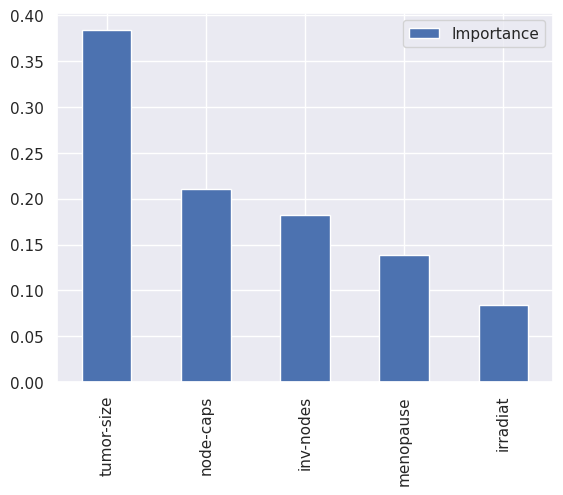

In [262]:
feature_importance(df2_mut_cat_final,'cat', 'deg-malig')